In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import polars as pl


date_parser= lambda x:datetime.strptime(x, '%Y/%m/%d %H:%M:%S:%f')
#df = pd.read_csv('VI09_2024-07-07_01-00-00_gg-44_int-2_th.csv', sep=';', parse_dates= ['time'], date_parser=date_parser, index_col='time')

#pd.to_datetime(df.index, unit='L')
#Load the csv file and use only one sensor data to downasmaple and chek the 
file_path = '/Users/thomas/Data/20241126/csv_acc/sample_17hr_26_11_2024.parquet'
sensor_columns = ['time', '030911D2_x', '03091005_x', '0309101F_x']
df = pl.read_parquet(file_path, columns=sensor_columns)

df = df.to_pandas()

df['time'] = pd.to_datetime(df['time'], format = '%Y/%m/%d %H:%M:%S:%f', errors="coerce", exact=False)

: 

In [2]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        360000 non-null  datetime64[ns]
 1   030911D2_x  360000 non-null  float64       
 2   03091005_x  360000 non-null  float64       
 3   0309101F_x  360000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.0 MB


Index(['time', '030911D2_x', '03091005_x', '0309101F_x'], dtype='object')

<Axes: >

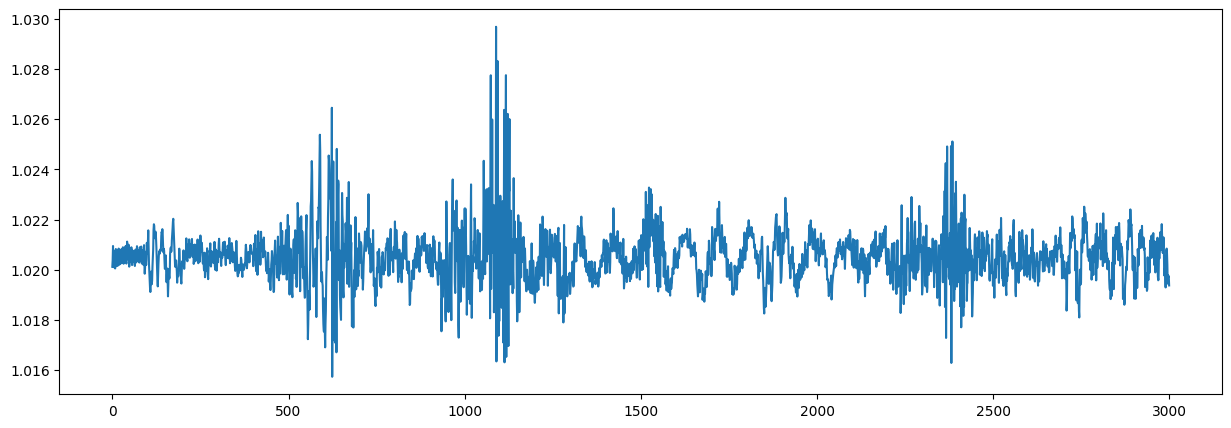

In [3]:
df.head()
df['030911D2_x'][:3000].plot(figsize=(15,5))


<Axes: >

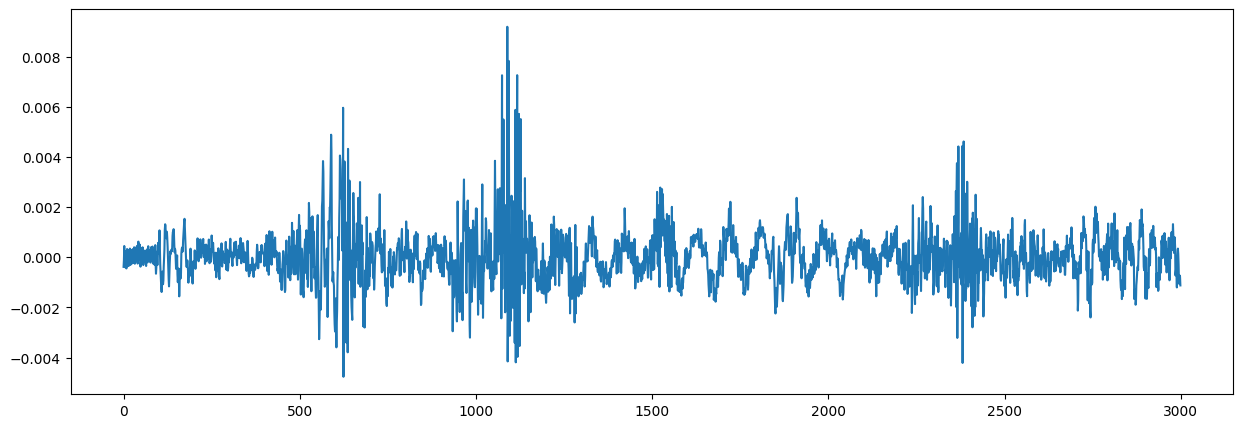

In [8]:
def filter_dc_by_mean(data, sensor_column):
    # Remove DC bias by subtracting the mean
    signal = data[sensor_column]
    signal = signal - signal.mean()
    data[sensor_column] = signal
    return data
sensor_column = sensor_columns[1:]
df = filter_dc_by_mean(df,sensor_column)

df.head()
df['030911D2_x'][:3000].plot(figsize=(15,5))

In [10]:
#simple movinng average with rolling window
df['030911D2_x_5_window_rolling'] = df['030911D2_x'].rolling(window=5, min_periods=2).mean()

df[['time', '030911D2_x', '030911D2_x_5_window_rolling']].head()

df['030911D2_x'][:3000].plot(figsize=(15,5))

,time,030911D2_x,030911D2_x_5_window_rolling
0,2024-11-26 17:00:00.000,-0.000381,NaN
1,2024-11-26 17:00:00.010,-0.000124,-0.000252
2,2024-11-26 17:00:00.020,0.000449,-0.000019
3,2024-11-26 17:00:00.030,-0.000357,-0.000103
4,2024-11-26 17:00:00.040,-0.000396,-0.000162


In [ ]:
df_sensor = df[['time', '030911D2_x','030911D2_x_5_window_rolling']]
df_sensor.plot(figsize=(15,6))
df_sensor.head()

TypeError: object of type 'Rolling' has no len()

,time,03091002_x
0,2024-11-26 17:00:00.000,1.022032
1,2024-11-26 17:00:00.010,1.022589
2,2024-11-26 17:00:00.020,1.023189
3,2024-11-26 17:00:00.030,1.022772
4,2024-11-26 17:00:00.040,1.022062


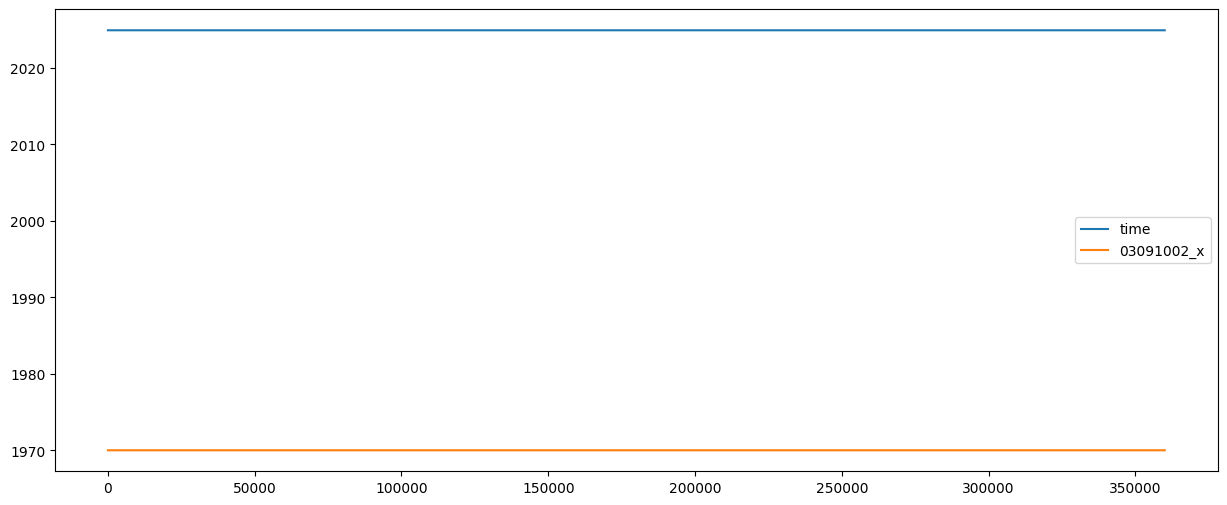

In [ ]:
df_sensor = df[['time', '03091002_x']]
df_sensor.plot(figsize=(15,6))
df_sensor.head()


ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [ ]:
#cummulative moving average (expanding)

df2['first sensor: cummulative average'] = df2['03067802_z'].expanding().mean()

df2[['03067802_z','first sensor: cummulative average']].plot(figsize=(15,6))

NameError: name 'df2' is not defined

<AxesSubplot: xlabel='time'>

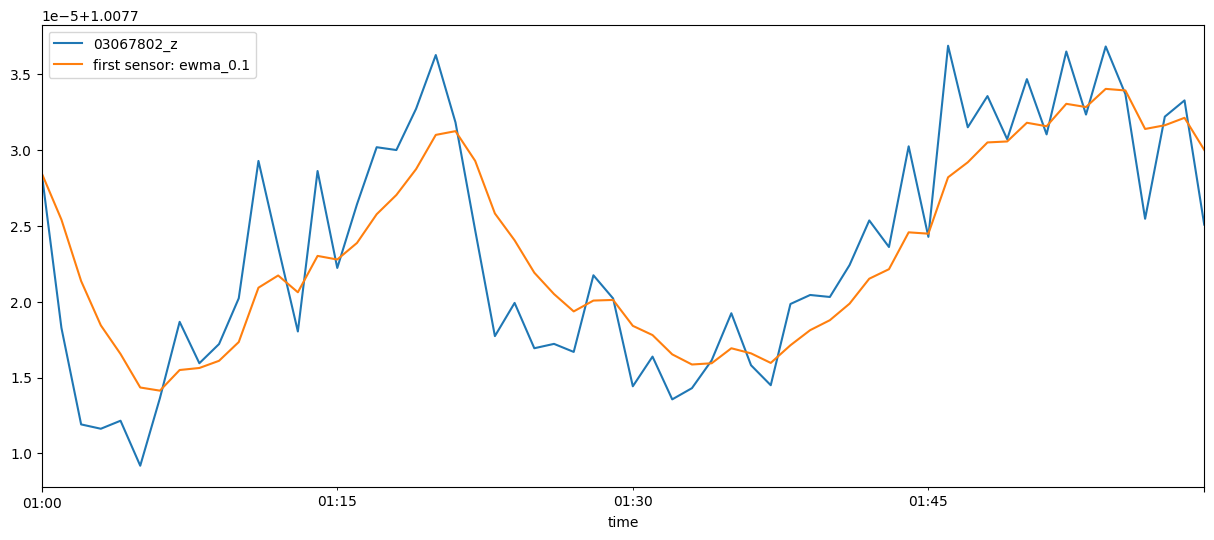

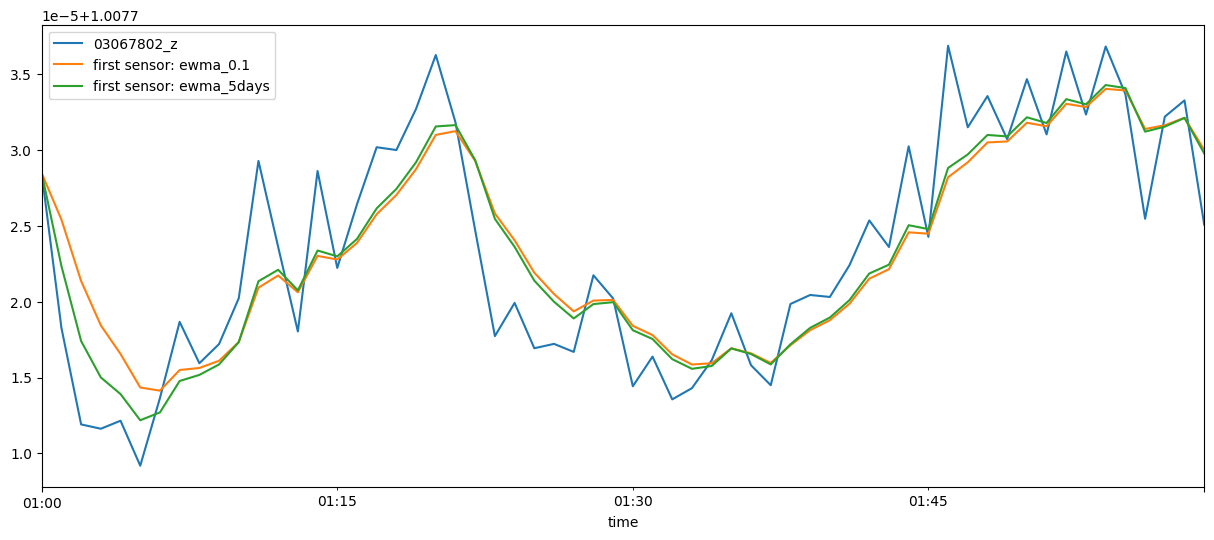

In [ ]:
#exponential moving average _EWMA-ewma
#with a smoothinf factor alpha = 0.1
df2['first sensor: ewma_0.1'] = df2['03067802_z'].ewm(alpha=0.3, adjust = False).mean()

df2[['03067802_z','first sensor: ewma_0.1']].plot(figsize=(15,6))

#using span parameter which is the multiplaction factor 2/(window+1), lets say window =5

df2['first sensor: ewma_5min'] = df2['03067802_z'].ewm(span=5).mean()

df2[['03067802_z','first sensor: ewma_0.1', 'first sensor: ewma_5min']].plot(figsize=(15,6))



In [ ]:
dr= pd.date_range('2024-07-07 00:00:00', '2024-07-07 00:19:59.995', freq='ms')


,0
0,2024-07-07 00:00:00.000
1,2024-07-07 00:00:00.001
2,2024-07-07 00:00:00.002
3,2024-07-07 00:00:00.003
4,2024-07-07 00:00:00.004
...,...
1199991,2024-07-07 00:19:59.991
1199992,2024-07-07 00:19:59.992
1199993,2024-07-07 00:19:59.993
1199994,2024-07-07 00:19:59.994
